In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df.set_index('Timestamp', inplace = True)

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [5]:
ts = df.drop(columns=['Open', 'High', 'Low','Close','Volume_(BTC)','Volume_(Currency)'])#df['Weighted_Price']

ts_day = ts.resample('D').mean()
ts_day.freq = 'D'
ts = ts_day
ts_day.freq = 'D'

ts_month = ts.resample('M').mean()
ts_month.freq = 'M'

ts_yr = ts.resample('A-DEC').mean()
ts_yr.freq = 'A-Dec'

In [6]:
# b/c FB Prophet requires specific labels
ts.reset_index(inplace=True)
ts = ts.rename(columns = {'Timestamp': 'ds', 'Weighted_Price': 'y'})

In [7]:
ts.head()

,ds,y
0,2011-12-31,4.471603
1,2012-01-01,4.806667
2,2012-01-02,5.000000
3,2012-01-03,5.252500
4,2012-01-04,5.208159


Text(0.5, 0, 'Date')

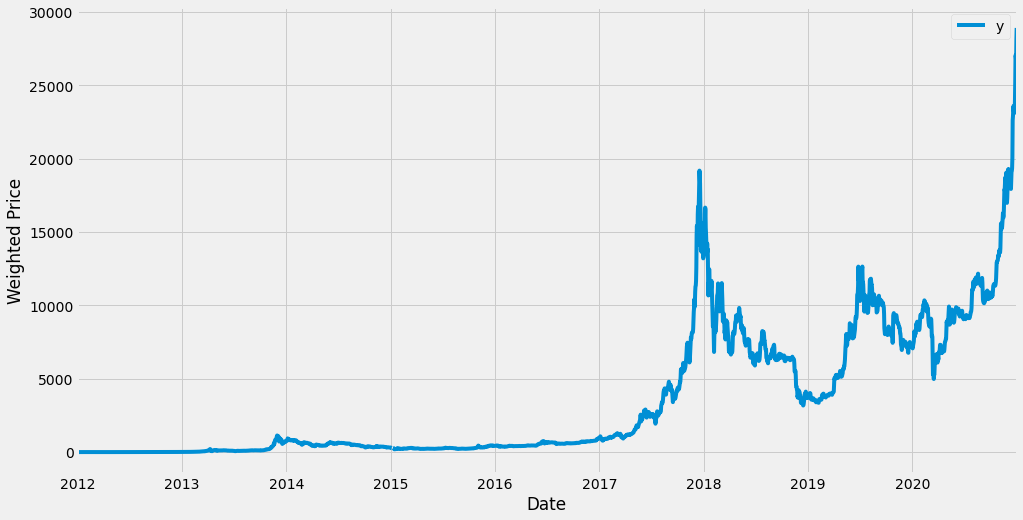

In [8]:
# Plot the timeseries 

pd.plotting.register_matplotlib_converters()
ax = ts.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Weighted Price')
ax.set_xlabel('Date')

# plt.show()

In [9]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
Model = Prophet(interval_width=0.95)

In [10]:
# Fit the timeseries to Model
Model.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future_dates = Model.make_future_dataframe(periods=12, freq='MS')
future_dates.tail()

,ds
3296,2021-08-01
3297,2021-09-01
3298,2021-10-01
3299,2021-11-01
3300,2021-12-01


In [12]:
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-12-31,95.968965,-1489.206354,3890.581209,95.968965,95.968965,1073.704625,1073.704625,1073.704625,-1.194365,-1.194365,-1.194365,1074.898990,1074.898990,1074.898990,0.0,0.0,0.0,1169.673590
1,2012-01-01,95.899660,-1690.977654,3922.940314,95.899660,95.899660,991.819092,991.819092,991.819092,-7.884221,-7.884221,-7.884221,999.703313,999.703313,999.703313,0.0,0.0,0.0,1087.718752
2,2012-01-02,95.830354,-1668.981648,4009.154132,95.830354,95.830354,922.578830,922.578830,922.578830,0.902637,0.902637,0.902637,921.676193,921.676193,921.676193,0.0,0.0,0.0,1018.409184
3,2012-01-03,95.761049,-1767.362105,3867.050859,95.761049,95.761049,851.433475,851.433475,851.433475,9.703843,9.703843,9.703843,841.729632,841.729632,841.729632,0.0,0.0,0.0,947.194524
4,2012-01-04,95.691744,-1913.431780,3872.225401,95.691744,95.691744,773.082436,773.082436,773.082436,12.315704,12.315704,12.315704,760.766732,760.766732,760.766732,0.0,0.0,0.0,868.774180


In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
3296,2021-08-01,16698.115730,13013.828572,20522.282148
3297,2021-09-01,17007.672119,12714.053856,21043.490098
3298,2021-10-01,16894.882019,12645.670906,21453.319864
3299,2021-11-01,17868.033539,12759.276303,23086.687912
3300,2021-12-01,18627.866716,12975.163411,24527.896892


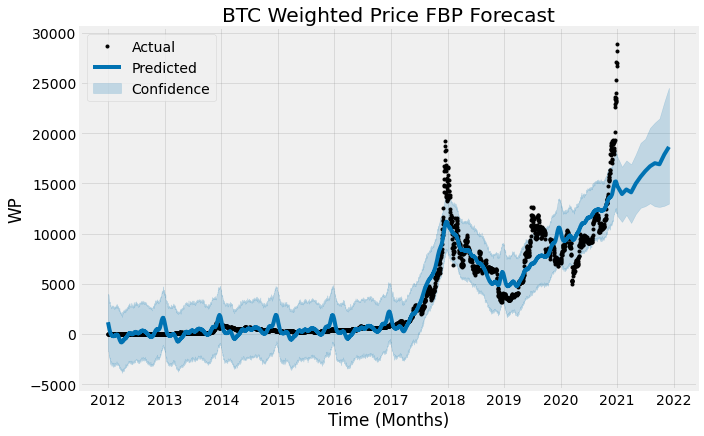

In [14]:
Model.plot(forecast, uncertainty=True)
plt.xlabel('Time (Months)')
plt.ylabel('WP')
plt.title('BTC Weighted Price FBP Forecast')
plt.legend(['Actual','Predicted','Confidence'])
plt.show()

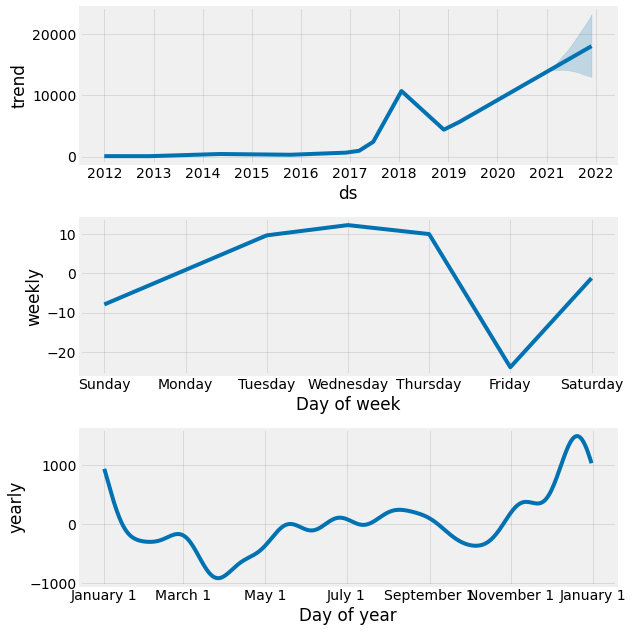

In [15]:
Model.plot_components(forecast)
plt.show()

# Comparing One Step Values

In [16]:
ts['y'].tail(31).mean()

21811.814497080082

In [17]:
forecast[['ds', 'yhat']].loc[(forecast['ds'] ==  '2021-1-1')] 

,ds,yhat
3289,2021-01-01,14754.035356
